# Data Description

**age:** Age of primary beneficiary

**sex:** Insurance contractor gender, female / male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg /   ) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoker / Non - smoker

**region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance.

# Importing Libraries

In [121]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading Data

In [122]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

Let's start to explore with shape of data.

In [123]:
print(f'Shape of the data : {df.shape}')

Shape of the data : (1338, 7)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observation : 

* 'age','bmi','children' and 'charge' are numerical features.
* Children is categorical feature that appears numerical. 
* 'sex', 'smoker' and 'region' are categorical features.

In [125]:
# Basic descriptive statistic of the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [126]:
# Checking # of Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
# Checking # of duplicated values
df.duplicated().sum()

1

In [128]:
# Investigating duplicated record
df.loc[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [129]:
df[(df['bmi']==30.59) & (df['charges']==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


#### Observation : 


It appears that record 195 and record 581 are duplicated.  

## Univariate Analysis

### Exploring and Visualizing Categorical Features

* Sex
* Children
* Smoker
* Region

In [130]:
def add_percentage_to_bar_plot(df,feature,plot,hue = None):
    if hue == None:
        total = len(df[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.15
            y = p.get_y() + p.get_height()+3
            ax.annotate(percentage, (x, y), size = 12)
        plt.show()
        
    else:        
        number_of_categories = len([x for x in df[feature].unique() if x==x])
        number_of_hue_categories =  len([x for x in df[hue].unique() if x==x])
        
        a = [p.get_height() for p in plot.patches]
        patch = [p for p in plot.patches]
        for i in range(number_of_categories):
            total = df[feature].value_counts().values[i]
            for j in range(number_of_hue_categories):
                percentage = '{:.1f}%'.format(100 * a[(j*number_of_categories + i)]/total)
                x = patch[(j*number_of_categories + i)].get_x() + patch[(j*number_of_categories + i)].get_width() / 2 - 0.20
                y = patch[(j*number_of_categories + i)].get_y() + patch[(j*number_of_categories + i)].get_height() + 3
                ax.annotate(percentage, (x, y), size = 12)
                %debug
        plt.show()

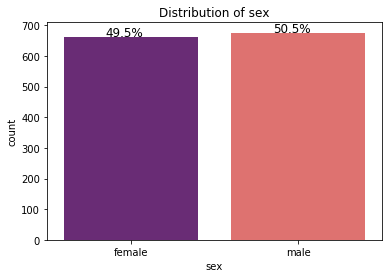

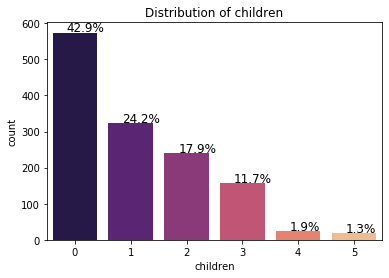

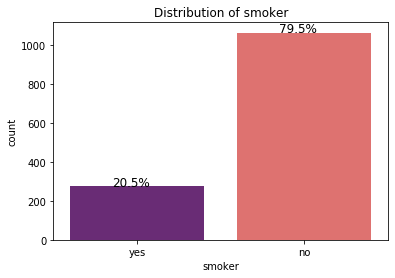

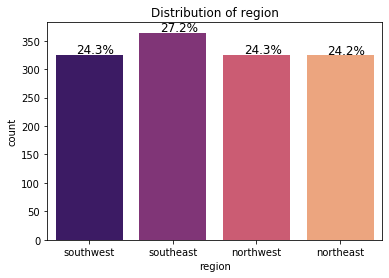

In [131]:
cat_features = ['sex','children','smoker','region']
for feature in cat_features:
    plt.title('Distribution of {}'.format(feature))
    ax = sns.countplot(data=df,x =feature ,palette='magma')
    add_percentage_to_bar_plot(df,feature,ax)
 

**Observations:** 

* Gender(sex) seems to be distributed almost equally.

* Number of children appears to be reasonably spread.

* Majority of the population are non-smokers (~%80).

* There is an almost equal distribution between regions.However, the highest rate (%27.2) belongs to the 'southest' region.

### Exploring and Visualizing Numeric Features

* age
* bmi
* charges

Let's check the basic summary statistics first, then continue to visualize these statistics and data distributions.

In [132]:
num_features = ['age','bmi','charges']

In [133]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


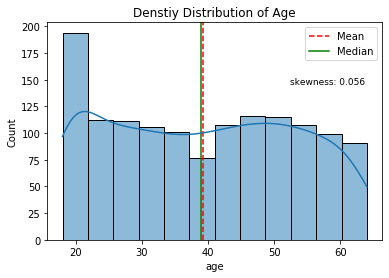

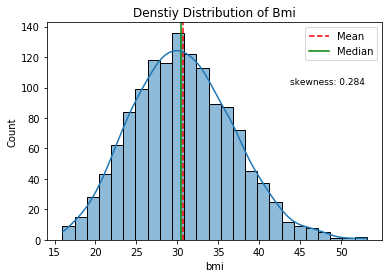

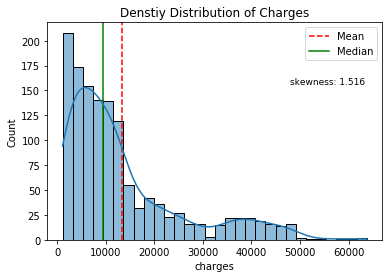

In [134]:
for feature in num_features:
    mean=df[feature].mean()
    median=df[feature].median()
    
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.legend({'Mean':mean,'Median':median})
    
    plt.title('Denstiy Distribution of {}'.format(feature.capitalize()))
    
    ax = sns.histplot(df[feature],kde=True)
    
    ax.text(0.95, 0.75,'skewness: {}' .format(str(round(df[feature].skew(),3))),
            transform = ax.transAxes, 
            ha="right", 
            va="top",  
            size=9)
    plt.show()

**Observations**

* Bmi feature appears to normally distributed. (non-skewed & mesokurtic )
* Medical charges appear to skew to the right. And the mean of charges is greater than its median. 
* The Age of the insured approximately follows a uniform distribution. 

Let's visualize the outliers for numeric values by using boxplot.

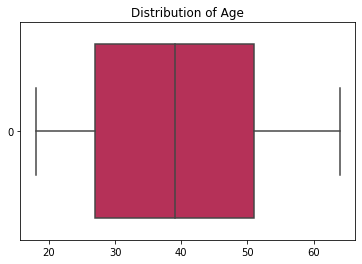

  Total number of outlier in age distirbutions : 0


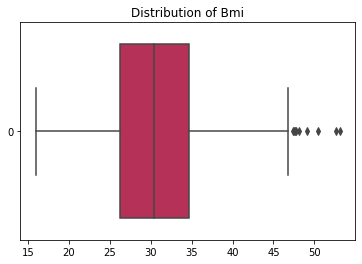

  Total number of outlier in bmi distirbutions : 9


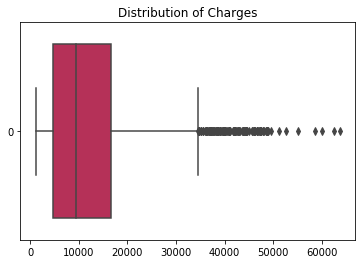

  Total number of outlier in charges distirbutions : 139


In [135]:
for feature in num_features:
    plt.title('Distribution of {}'.format(feature.capitalize()))
    
    ax = sns.boxplot(data=df[feature],palette='rocket',orient='h')
    
    plt.show()
    #calculating # outliers.
    Q1 =df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    total_number_of_outlier = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    print('  Total number of outlier in {} distirbutions : {}'.format(feature,total_number_of_outlier))

**Observations**

* The average age of claimants is ~39, and the claimants are between the ages of 18 and 64 (all of them are adults).

* There are a total of 9 outlier values in the BMI distribution, all in the higher side.

* Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side.

## Bivariate Analysis

In [136]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


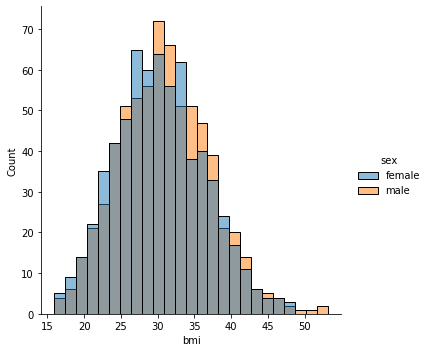

In [138]:
sns.displot(data=df,x='bmi',hue='sex')

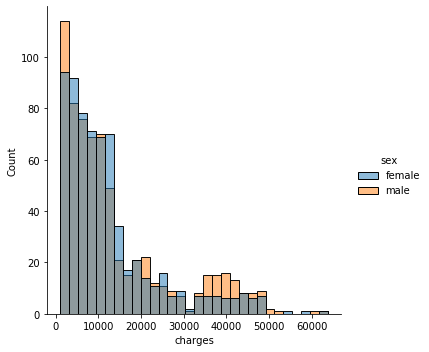

In [139]:
sns.displot(data=df,x='charges',hue='sex')

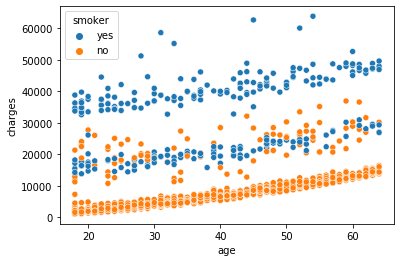

In [149]:
sns.scatterplot(data=df, x = 'age', y = 'charges', hue='smoker')

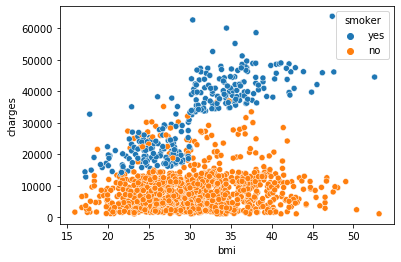

In [152]:
sns.scatterplot(data=df, y = 'charges', x = 'bmi', hue='smoker')

## Multivariate Analysis